# Titanic Analysis
#### Version 7
#### By: Maikel Chandika (mkdika@gmail.com)
This is my first Kaggle Competition analysis Notebook. Using the 'Hello World' case and dataset from Kaggle, [**Titanic**: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). Dataset is downloaded from [here](https://www.kaggle.com/c/titanic/data).

- Try to making improvement on Feature Engineering
- Add Neural Network (NN) & Deep Neural Network/Deep Learning (DNN) as Algorithm Comparisson
- DNN with KERAS - Theano & TensorFlow Wrapper

## I. Exploratory Data Analysis
- Load Libraries
- Load Dataset
- Data Understanding & Visualization

In [104]:
# import Data Analytics & Data Visualization Library
import warnings
warnings.filterwarnings('ignore')

import csv as csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow.contrib.learn.python.learn as learn

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD

# preview matplotlib plot in jupyter notebook
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv',header=0)
test = pd.read_csv('test.csv',header=0)

## II. Feature Engineering
- Fine Data Cleaning
- Data Transform
- Feature Scaling
- Feature Weights and Selection

In [3]:
# preview data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# data descriptive
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Combine Train & Test Data to Easier Processing

In [6]:
# reading train data
train = pd.read_csv('train.csv')

# reading test data
test = pd.read_csv('test.csv')

# extracting and then removing the targets from the training data 
target = train['Survived']
train.drop('Survived',1,inplace=True)

# merging train data and test data for future feature engineering
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop('index',inplace=True,axis=1)

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [8]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting the passenger titles

In [9]:
# we extract the title from each name
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [10]:
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }

In [11]:
# we map each title
combined['Title'] = combined.Title.map(Title_Dictionary)

In [12]:
combined['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [13]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Processing Ages Column

In [14]:
# we want to fill the NaN 'Age' column value base on mean of their 'Sex, PClass & Title'
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [15]:
# make a function to fill NaN Age
def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26

In [16]:
combined['Age'] = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)

In [17]:
# NaN column has been filled.
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [18]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.278205,0.498854,0.385027,33.295479
std,378.020061,0.837836,13.446690,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,36.500000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Processing Fare

In [20]:
# get mean (average) value of fare by Pclass
groupedfare = combined.groupby(['Pclass'])
groupedfare['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [21]:
# create function to easier fill NaN
def fillFare(row):
        if row['Pclass']==1:
            return 87.508992
        elif row['Pclass']==2:
            return 21.179196
        elif row['Pclass']==3:
            return 13.302889  

In [22]:
combined['Fare'] = combined.apply(lambda r : fillFare(r) if np.isnan(r['Fare']) else r['Fare'], axis=1)

In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


### Processing Clean Name column

In [24]:
# we clean the Name variable
combined.drop('Name',axis=1,inplace=True)

In [25]:
# encoding in dummy variable
titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
combined = pd.concat([combined,titles_dummies],axis=1)

In [26]:
# removing the title variable
combined.drop('Title',axis=1,inplace=True)

In [27]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### Processing Embarked

In [28]:
combined.drop('Embarked',axis=1,inplace=True)

In [29]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0


In [30]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(6)
memory usage: 99.8+ KB


### Processing Cabin

In [31]:
# too many missing data, drop cabin
combined.drop('Cabin',axis=1,inplace=True)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0


### Processing Sex

In [32]:
combined['Sex'] = combined['Sex'].map({'male':1,'female':0})

In [33]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0
1,2,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0
3,4,1,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0
4,5,3,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0


### Processing Ticket

In [34]:
# drop ticket, doesnt correlated to survival
combined.drop('Ticket',axis=1,inplace=True)

In [35]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,1,22.0,1,0,7.2500,0,0,1,0,0,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,0,0,0
3,4,1,0,35.0,1,0,53.1000,0,0,0,1,0,0
4,5,3,1,35.0,0,0,8.0500,0,0,1,0,0,0


### Processing Pclass

In [36]:
pclass_dummies = pd.get_dummies(combined['Pclass'],prefix='Pclass')
combined = pd.concat([combined,pclass_dummies],axis=1)
combined.drop('Pclass',axis=1,inplace=True)

In [37]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,1,0,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1


### Processing Family

In [38]:
# introducing a new feature : the size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined.drop('Parch',axis=1,inplace=True)
combined.drop('SibSp',axis=1,inplace=True)

In [39]:
combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)

In [40]:
combined.drop('FamilySize',axis=1,inplace=True)

In [41]:
combined.head()

,PassengerId,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,7.2500,0,0,1,0,0,0,0,0,1,0,1,0
1,2,0,38.0,71.2833,0,0,0,1,0,0,1,0,0,0,1,0
2,3,0,26.0,7.9250,0,1,0,0,0,0,0,0,1,1,0,0
3,4,0,35.0,53.1000,0,0,0,1,0,0,1,0,0,0,1,0
4,5,1,35.0,8.0500,0,0,1,0,0,0,0,0,1,1,0,0


### Recovering TRAIN & TEST dataset

In [42]:
train = combined.ix[0:890].drop('PassengerId',axis=1)
test = combined.ix[891:].drop('PassengerId',axis=1)

In [43]:
train.head()

,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,Singleton,SmallFamily,LargeFamily
0,1,22.0,7.2500,0,0,1,0,0,0,0,0,1,0,1,0
1,0,38.0,71.2833,0,0,0,1,0,0,1,0,0,0,1,0
2,0,26.0,7.9250,0,1,0,0,0,0,0,0,1,1,0,0
3,0,35.0,53.1000,0,0,0,1,0,0,1,0,0,0,1,0
4,1,35.0,8.0500,0,0,1,0,0,0,0,0,1,1,0,0


In [44]:
train.shape

(891, 15)

In [46]:
test.head()

,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,Singleton,SmallFamily,LargeFamily
891,1,34.5,7.8292,0,0,1,0,0,0,0,0,1,1,0,0
892,0,47.0,7.0000,0,0,0,1,0,0,0,0,1,0,1,0
893,1,62.0,9.6875,0,0,1,0,0,0,0,1,0,1,0,0
894,1,27.0,8.6625,0,0,1,0,0,0,0,0,1,1,0,0
895,0,22.0,12.2875,0,0,0,1,0,0,0,0,1,0,1,0


## Principle Component Anlysis (PCA)

In [47]:
scaler = StandardScaler()
scaler.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scaled_data = scaler.transform(train)

In [49]:
pca = PCA()

In [51]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

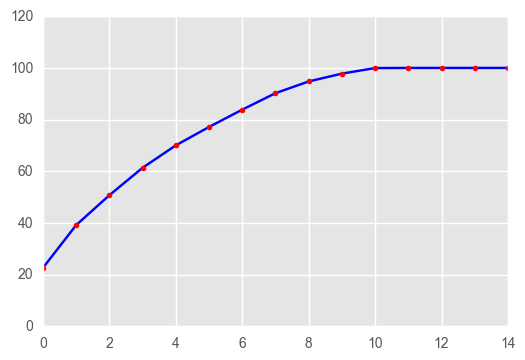

In [53]:
plt.figure(figsize=(6,4))
plt.ylim([0,120])
plt.plot(var1,color='blue',
        marker='o',markerfacecolor='red',markersize=4)

In [55]:
# as above result I choose around 10 of attribute
pca = PCA()

In [56]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
x_pca = pca.transform(scaled_data)

In [58]:
scaled_data.shape

(891, 15)

In [59]:
x_pca.shape

(891, 15)

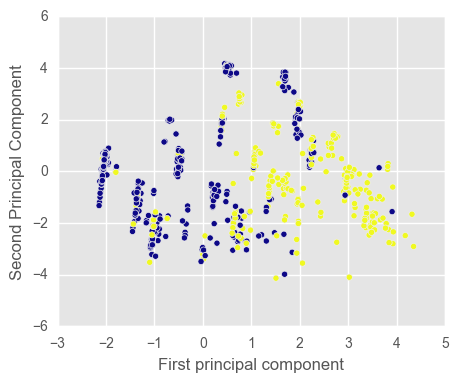

In [60]:
plt.figure(figsize=(5,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [61]:
scaler = StandardScaler()
scaler.fit(test)
scaled_data_test = scaler.transform(test)
pca.fit(scaled_data_test)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
test_new = pca.transform(scaled_data_test)
test_new.shape

(418, 15)

## III. Evaluate Algorithms
- Split-Out Validation Dataset
- Test Options and Evaluation Metric
- Compare Algorithms
- Ensemble Methods

### Split-out Dataset

In [63]:
train_new = x_pca

In [64]:
from sklearn.model_selection import train_test_split

validation_size = 0.34
x_train, x_test, y_train, y_test = train_test_split(train_new, 
                                                    target, test_size=validation_size)                                                    

### Algorithm to Compare
- Logistic Regression
- Linear Discriminant Analysis
- K-Nearest Neighbors
- Decision Tree Classifier
- Gaussian Naive Bayes
- Supported Vector Classifier (SVM)

In [65]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))
print('Total Algorithm to compare: ',len(pipelines))

Total Algorithm to compare:  5


In [66]:
from sklearn.metrics import accuracy_score
results = []
names = []
scoring = 'accuracy'
num_folds = 10
seed = 7

In [67]:
for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

ScaledLR: 0.810972 (0.041258)
ScaledKNN: 0.812667 (0.045624)
ScaledCART: 0.729260 (0.063169)
ScaledNB: 0.761641 (0.086989)
ScaledSVM: 0.814362 (0.052369)


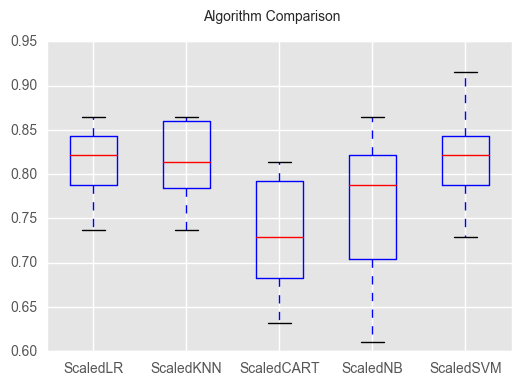

In [69]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Top 2 Algorithm
- **Logistic Regression**
- **SVM**

#### Optimizing Logistic Regression

In [75]:
x_train.shape

(588, 15)

In [100]:
param_grid = {'penalty':['l1','l2'],
              'C':[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0,10,20]}              
                           
model = LogisticRegression()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
gridLR = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring,cv=kfold,n_jobs=-1,refit=True)
grid_result = gridLR.fit(x_train, y_train)

################### PREVIEW RESULT ########################## 
print('Best score: %0.5f' % grid_result.best_score_)
print ('Best parameters set:')
best_parameters = gridLR.best_estimator_.get_params()
for param_name in sorted(grid_result.best_params_.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best score: 0.81973
Best parameters set:
	C: 0.1
	penalty: 'l1'


In [101]:
pred = gridLR.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[178  22]
 [ 26  77]]

Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.89      0.88       200
          1       0.78      0.75      0.76       103

avg / total       0.84      0.84      0.84       303



#### Bagging Ensemble for LR

In [117]:
seed = 7
num_trees = 100
lr = LogisticRegression(C=0.1,penalty='l1')
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
bag_lr = BaggingClassifier(base_estimator=lr, n_estimators=num_trees, random_state=seed)

bag_lr.fit(x_train,y_train)
pred = bag_lr.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[178  22]
 [ 26  77]]

Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.89      0.88       200
          1       0.78      0.75      0.76       103

avg / total       0.84      0.84      0.84       303



#### Optimizing SVM

In [69]:
param_grid = {'C':[0.1,0.3,0.5,0.7,0.9,1.0],'gamma':[1,0.1,0.01],
              'kernel':['linear','poly','rbf','sigmoid']}
model = SVC()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
gridSVM = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring,cv=kfold,n_jobs=-1,refit=True)
grid_result = gridSVM.fit(x_train, y_train)

################### PREVIEW RESULT ##########################
print('Best score: %0.5f' % grid_result.best_score_)
print ('Best parameters set:')
best_parameters = gridSVM.best_estimator_.get_params()
for param_name in sorted(grid_result.best_params_.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best score: 0.82993
Best parameters set:
	C: 0.1
	gamma: 0.1
	kernel: 'rbf'


In [70]:
pred = gridSVM.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[156  20]
 [ 33  94]]

Classification Report:
              precision    recall  f1-score   support

          0       0.83      0.89      0.85       176
          1       0.82      0.74      0.78       127

avg / total       0.83      0.83      0.82       303



#### Optimize result
- Logistic Regression: **0.814589** -> **0.82444**
- SVM: **0.818876** -> **0.83287**

### Deep Neural Network (DNN)

In [71]:
classifier = learn.DNNClassifier(hidden_units=[100,150,100], n_classes=2)
classifier.fit(x_train, y_train, steps=300, batch_size=32)

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


DNNClassifier(hidden_units=[100, 150, 100], dropout=None, optimizer=None, feature_columns=None)

In [72]:
pred = classifier.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[160  16]
 [ 37  90]]

Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.91      0.86       176
          1       0.85      0.71      0.77       127

avg / total       0.83      0.83      0.82       303



### Deep Learning with KERAS TensorFlow

In [112]:
seed = 7
np.random.seed(seed)

In [169]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(15,)))
    model.add(Dense(100,init='normal',activation='relu',W_constraint=maxnorm(3)))
    model.add(Dense(150,init='normal',activation='relu',W_constraint=maxnorm(3)))
#     model.add(Dropout(0.2))
    model.add(Dense(100,init='normal',activation='relu',W_constraint=maxnorm(3)))    
    #model.add(Dropout(0.2))
    model.add(Dense(1,init='normal',activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

In [170]:
# evaluate model
keras = KerasClassifier(build_fn=create_baseline,nb_epoch=300,batch_size=5,verbose=0)
keras.fit(x_train, y_train)
pred = keras.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[132  44]
 [ 22 105]]

Classification Report:
              precision    recall  f1-score   support

          0       0.86      0.75      0.80       176
          1       0.70      0.83      0.76       127

avg / total       0.79      0.78      0.78       303



### Ensemble Algorithms to Compare
- Ada Boost Classifier
- Gradient Boosting Classifier
- Random Forest Classifier
- Extra Trees Classifier

In [220]:
ensembles = []
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))
print('Total Ensembles Algorithm to compare: ',len(ensembles))

Total Ensembles Algorithm to compare:  4


In [221]:
resultse = []
names = []
for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    resultse.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

AB: 0.811145 (0.047487)
GBM: 0.819649 (0.052767)
RF: 0.777126 (0.039494)
ET: 0.784049 (0.044590)


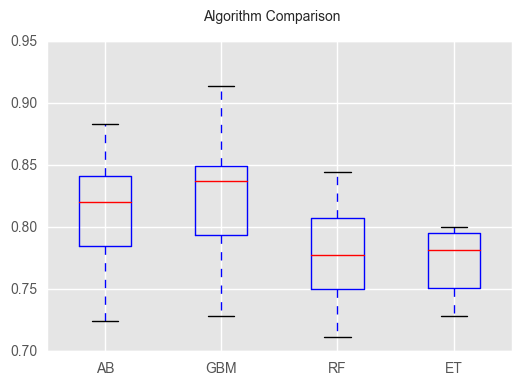

In [222]:
# boxplot ensemble algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultse)
ax.set_xticklabels(names)
plt.show()

#### Optimizing Gradient Boosting

In [223]:

param_grid = {'loss':['deviance','exponential'],'n_estimators':[100,200,300],
             'max_features':[8,9,10,11]}

model = GradientBoostingClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
gridGBM = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring,cv=kfold,n_jobs=-1,refit=True)
grid_result = gridGBM.fit(x_train, y_train)

################### PREVIEW RESULT ##########################
print('Best score: %0.5f' % grid_result.best_score_)
print ('Best parameters set:')
best_parameters = gridGBM.best_estimator_.get_params()
for param_name in sorted(grid_result.best_params_.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best score: 0.82823
Best parameters set:
	loss: 'deviance'
	max_features: 10
	n_estimators: 100


In [224]:
pred = gridGBM.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[160  17]
 [ 36  90]]

Classification Report:
              precision    recall  f1-score   support

          0       0.82      0.90      0.86       177
          1       0.84      0.71      0.77       126

avg / total       0.83      0.83      0.82       303



#### Optimizing Random Forest

In [225]:
param_grid = {
                'max_depth': [4,5,6],
                'n_estimators': [50,100,150,210],
                'criterion': ['gini','entropy']
             }

model = RandomForestClassifier(max_features='sqrt')
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
gridRF = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring,cv=kfold,n_jobs=-1,refit=True)
grid_result = gridRF.fit(x_train, y_train)

################### PREVIEW RESULT ##########################
print('Best score: %0.5f' % grid_result.best_score_)
print ('Best parameters set:')
best_parameters = gridRF.best_estimator_.get_params()
for param_name in sorted(grid_result.best_params_.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best score: 0.82823
Best parameters set:
	criterion: 'entropy'
	max_depth: 5
	n_estimators: 150


In [226]:
pred = gridRF.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('')
print('Classification Report:\n',classification_report(y_test,pred))

Confusion Matrix:
 [[164  13]
 [ 37  89]]

Classification Report:
              precision    recall  f1-score   support

          0       0.82      0.93      0.87       177
          1       0.87      0.71      0.78       126

avg / total       0.84      0.83      0.83       303



#### Ensemble Algorithm Optimize result
- Gradient Boosting: **0.812037** -> **0.83788**
- Random Forest: **0.813756** -> **0.83628**

## V. Processing TEST dataset & Kaggle Submission

In [171]:
test_new.shape

(418, 15)

In [172]:
test = pd.read_csv('test.csv')

In [173]:
predictions = keras.predict(test_new).astype(int)
ids = test['PassengerId'].values

In [174]:
# predictions = predictions.replace('[','')
# predictions = predictions.replace(']','')
# predictions
pred = predictions.reshape(1,418)

In [175]:
pred[0]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

In [176]:
predictions_file = open('kaggleKERAS.csv','w',newline='')
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(['PassengerId','Survived'])
open_file_object.writerows(zip(ids,pred[0]))
predictions_file.close()
print('Done!')

Done!


# THE END